In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import cross_val_score
import eli5
import ast
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

In [2]:
plasma_rf=pd.read_csv("R/GEO_count/pan_train_new.csv")

In [3]:
plasma_rf.iloc[:,0]

0      TCGA.73.4675.01A.01T.1207.13
1      TCGA.58.8388.01A.11H.2325.13
2                        SRR6757411
3      TCGA.55.6972.01A.11H.1948.13
4                        SRR6757427
                   ...             
807                             BR1
808                     SRR11563525
809                     SRR19423144
810                     SRR11563486
811                     SRR19423142
Name: Unnamed: 0, Length: 812, dtype: object

In [4]:
plasma_rf=plasma_rf.set_index('Unnamed: 0')

In [5]:
plasma_rf

,group,piR.hsa.100956,piR.hsa.1288731,piR.hsa.141155,piR.hsa.2499988,piR.hsa.2851799
Unnamed: 0,,,,,,
TCGA.73.4675.01A.01T.1207.13,tumor,5.743220,4.033169,3.429994,4.317952,4.246273
TCGA.58.8388.01A.11H.2325.13,tumor,5.693867,2.831566,2.140202,1.845942,1.439445
SRR6757411,normal,6.834785,3.176711,1.733974,2.252934,1.362492
TCGA.55.6972.01A.11H.1948.13,tumor,5.993028,3.916697,2.111314,2.450450,0.374061
SRR6757427,normal,5.789100,2.239036,1.651842,2.247118,1.349626
...,...,...,...,...,...,...
BR1,normal,5.804358,3.520249,2.475427,2.551951,1.953297
SRR11563525,normal,6.505323,2.606157,1.952790,2.447231,1.349920
SRR19423144,normal,6.084680,3.030814,1.146391,2.821909,2.159927


In [6]:
X_train = plasma_rf.drop(columns=['group'])

In [7]:
y_train = plasma_rf['group']
print(y_train)

Unnamed: 0
TCGA.73.4675.01A.01T.1207.13     tumor
TCGA.58.8388.01A.11H.2325.13     tumor
SRR6757411                      normal
TCGA.55.6972.01A.11H.1948.13     tumor
SRR6757427                      normal
                                 ...  
BR1                             normal
SRR11563525                     normal
SRR19423144                     normal
SRR11563486                      tumor
SRR19423142                     normal
Name: group, Length: 812, dtype: object


In [79]:
test_logit=pd.read_csv("R/GEO_count/exosome_test_new_BC.csv",)

In [80]:
test_logit

,Unnamed: 0,group,piR.hsa.100956,piR.hsa.1288731,piR.hsa.141155,piR.hsa.2499988,piR.hsa.2851799
0,CHTN_sample001,tumor,5.916746,0.729600,2.336389,2.325916,1.474482
1,CHTN_sample002,tumor,5.446118,4.705826,2.050439,3.132980,1.582692
2,CHTN_sample003,tumor,5.046015,0.729600,1.968416,1.245362,1.821030
3,CHTN_sample010,tumor,4.986942,0.729600,2.062667,-1.376835,1.911661
4,CHTN_sample011,tumor,4.652436,0.729600,1.104336,1.084230,2.658551
5,CHTN_sample015,tumor,5.687537,0.729600,2.026373,-1.376835,1.574140
6,CHTN_sample018,tumor,5.551245,3.381490,2.037760,2.896852,1.545400
7,CHTN_sample019,tumor,5.461571,0.729600,1.720112,2.052385,1.784519
8,CHTN_sample020,tumor,5.378565,3.598528,2.037691,1.559630,1.292128
9,CHTN_sample028,tumor,6.096375,4.930324,1.926306,4.218971,1.313707


In [81]:
test_logit=test_logit.set_index('Unnamed: 0')

In [82]:
X_test=test_logit.drop(columns=['group'])

In [83]:
y_test = test_logit['group']
print(y_test)

Unnamed: 0
CHTN_sample001     tumor
CHTN_sample002     tumor
CHTN_sample003     tumor
CHTN_sample010     tumor
CHTN_sample011     tumor
CHTN_sample015     tumor
CHTN_sample018     tumor
CHTN_sample019     tumor
CHTN_sample020     tumor
CHTN_sample028     tumor
CHTN_sample029     tumor
CHTN_sample033     tumor
CHTN_sample046     tumor
CHTN_sample047     tumor
CHTN_sample049     tumor
CHTN_sample051     tumor
CHTN_sample058     tumor
CHTN_sample059     tumor
CHTN_sample060     tumor
CHTN_sample061     tumor
CHTN_sample063     tumor
CHTN_sample067     tumor
CHTN_sample068     tumor
CHTN_sample070     tumor
CHTN_sample075    normal
CHTN_sample077    normal
CHTN_sample082    normal
CHTN_sample090    normal
CHTN_sample097    normal
CHTN_sample100    normal
CHTN_sample102    normal
CHTN_sample106    normal
CHTN_sample109    normal
CHTN_sample110    normal
CHTN_sample113    normal
CHTN_sample115    normal
CHTN_sample121    normal
CHTN_sample124    normal
CHTN_sample125    normal
CHTN_sample126

In [84]:
X_test

,piR.hsa.100956,piR.hsa.1288731,piR.hsa.141155,piR.hsa.2499988,piR.hsa.2851799
Unnamed: 0,,,,,
CHTN_sample001,5.916746,0.729600,2.336389,2.325916,1.474482
CHTN_sample002,5.446118,4.705826,2.050439,3.132980,1.582692
CHTN_sample003,5.046015,0.729600,1.968416,1.245362,1.821030
CHTN_sample010,4.986942,0.729600,2.062667,-1.376835,1.911661
CHTN_sample011,4.652436,0.729600,1.104336,1.084230,2.658551
CHTN_sample015,5.687537,0.729600,2.026373,-1.376835,1.574140
CHTN_sample018,5.551245,3.381490,2.037760,2.896852,1.545400
CHTN_sample019,5.461571,0.729600,1.720112,2.052385,1.784519
CHTN_sample020,5.378565,3.598528,2.037691,1.559630,1.292128


In [85]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)

# Compute accuracy for validation and test sets, threshold 0.5
acc_log = accuracy_score(y_test, y_pred_log)

# Compute predicted probabilities for AUC calculation
y_prob_log = model.predict_proba(X_test)[:, 1]

# Compute AUC for validation and test sets
auc_log = roc_auc_score(y_test, y_prob_log)

print(f"Accuracy: {acc_log:.4f}")
print(f"AUC: {auc_log:.4f}")

#roc_curve
y_binary_log = label_binarize(y_test, classes=['normal', 'tumor']).flatten()
fpr_log, tpr_log, thresholds_test = roc_curve(y_binary_log, y_prob_log)
youden_J_test = tpr_log - fpr_log
# Locate the index of the largest J statistic
ix_test = np.argmax(youden_J_test)
optimal_threshold_test = thresholds_test[ix_test]

print('Best Threshold=%f, Youden J=%.3f' % (optimal_threshold_test, youden_J_test[ix_test]))


Accuracy: 0.6600
AUC: 0.7308
Best Threshold=0.342874, Youden J=0.452


In [86]:
y_pred_train = model.predict(X_train)

# Compute accuracy for validation and test sets, threshold 0.5
acc_train = accuracy_score(y_train, y_pred_train)

# Compute predicted probabilities for AUC calculation
y_prob_train = model.predict_proba(X_train)[:, 1]

# Compute AUC for validation and test sets
auc_train = roc_auc_score(y_train, y_prob_train)

print(f"Accuracy: {acc_train:.4f}")
print(f"AUC: {auc_train:.4f}")

#roc_curve
y_binary_train = label_binarize(y_train, classes=['normal', 'tumor']).flatten()
fpr_train, tpr_train, thresholds_train = roc_curve(y_binary_train, y_prob_train)
youden_J_train = tpr_train - fpr_train
# Locate the index of the largest J statistic
ix_train = np.argmax(youden_J_train)
optimal_threshold_train = thresholds_train[ix_train]

print('Best Threshold=%f, Youden J=%.3f' % (optimal_threshold_train, youden_J_train[ix_train]))

precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, y_prob_train,pos_label='tumor')
auprc_train = auc(recall_train, precision_train)
print("auprc_train:", auprc_train)

Accuracy: 0.7836
AUC: 0.8733
Best Threshold=0.312596, Youden J=0.641
auprc_train: 0.7727113280628104


In [87]:
f1_scores_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
# Handle division by zero in case precision and recall are both zero
f1_scores_train = np.nan_to_num(f1_scores_train)

optimal_idx_train = np.argmax(f1_scores_train)
optimal_threshold_train = thresholds_train[optimal_idx_train]
best_f1_score_train = f1_scores_train[optimal_idx_train] 
print("Optimal threshold:", optimal_threshold_train)
print("best f score:", best_f1_score_train)


y_pred_optimal_threshold_train = np.where(y_prob_train >= optimal_threshold_train, "tumor", "normal")

tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_optimal_threshold_train).ravel()

ppv_train = tp_train / (tp_train + fp_train) if (tp_train + fp_train) != 0 else 0

# Negative Predictive Value
npv_train = tn_train / (tn_train + fn_train) if (tn_train + fn_train) != 0 else 0

# Sensitivity (Recall)
sensitivity_train = tp_train / (tp_train + fn_train) if (tp_train + fn_train) != 0 else 0

# Specificity
specificity_train = tn_train / (tn_train + fp_train) if (tn_train + fp_train) != 0 else 0

print(f"PPV/Precision: {ppv_train}")
print(f"NPV: {npv_train}")
print(f"Sensitivity/Recall: {sensitivity_train}")
print(f"Specificity: {specificity_train}")

Optimal threshold: 0.31259604482074654
best f score: 0.7567567567567568
PPV/Precision: 0.65625
NPV: 0.9285714285714286
Sensitivity/Recall: 0.8936170212765957
Specificity: 0.7471264367816092


In [213]:
# #threshold 0.5
# # f1_train=f1_score(y_train,y_pred_train,pos_label='tumor')
# # precision_train_score = precision_score(y_train, y_pred_train, pos_label='tumor')
# # recall_train_score = recall_score(y_train, y_pred_train, pos_label='tumor')
# # print(f"F1-Score_train: {f1_train}")
# # print(f"Precision_train: {precision_train_score}")
# # print(f"Recall_train: {recall_train_score}")

# f1_test=f1_score(y_test,y_pred_log,pos_label='tumor')
# precision_test_score = precision_score(y_test, y_pred_log, pos_label='tumor')
# recall_test_score = recall_score(y_test, y_pred_log, pos_label='tumor')
# print(f"F1-Score_test: {f1_test}")
# print(f"Precision_test: {precision_test_score}")
# print(f"Recall_test: {recall_test_score}")

In [224]:
precision_test, recall_test, thresholds_test = precision_recall_curve(y_test, y_prob_log,pos_label='tumor')
f1_scores_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
# Handle division by zero in case precision and recall are both zero
f1_scores_test = np.nan_to_num(f1_scores_test)

optimal_idx_test = np.argmax(f1_scores_test)
optimal_threshold_test = thresholds_test[optimal_idx_test]
best_f1_score_test = f1_scores_test[optimal_idx_test] 
print("Optimal threshold:", optimal_threshold_test)
print("best f score:", best_f1_score_test)


y_pred_optimal_threshold_test = np.where(y_prob_log >= optimal_threshold_test, "tumor", "normal")

tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_optimal_threshold_test).ravel()

ppv_test = tp_test / (tp_test + fp_test) if (tp_test + fp_test) != 0 else 0

# Negative Predictive Value
npv_test = tn_test / (tn_test + fn_test) if (tn_test + fn_test) != 0 else 0

# Sensitivity (Recall)
sensitivity_test = tp_test / (tp_test + fn_test) if (tp_test + fn_test) != 0 else 0

# Specificity
specificity_test = tn_test / (tn_test + fp_test) if (tn_test + fp_test) != 0 else 0


#AUPRC
auprc_test = auc(recall_test, precision_test)
print("auprc_test:", auprc_test)


print(f"PPV/Precision: {ppv_test}")
print(f"NPV: {npv_test}")
print(f"Sensitivity/Recall: {sensitivity_test}")
print(f"Specificity: {specificity_test}")

Optimal threshold: 0.3428738616147365
best f score: 0.75
auprc_test: 0.704899595540052
PPV/Precision: 0.65625
NPV: 0.8333333333333334
Sensitivity/Recall: 0.875
Specificity: 0.5769230769230769


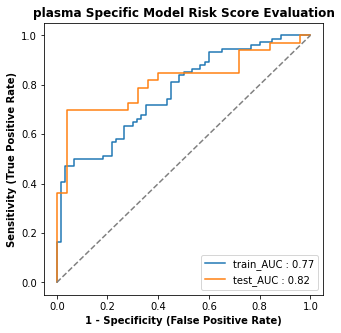

In [185]:
# score

plt.figure(figsize=(5, 5))

# plot ROC curve for the train set
plt.plot(fpr_train, tpr_train, label=f'train_AUC : {auc_train:.2f}')

# plot ROC curve for the train set
plt.plot(fpr_log, tpr_log, label=f'test_AUC : {auc_log:.2f}')

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, and other settings
plt.xlabel('1 - Specificity (False Positive Rate)', fontweight='bold')
plt.ylabel('Sensitivity (True Positive Rate)', fontweight='bold')
legend = plt.legend(loc='lower right')
plt.grid(False)
plt.title('plasma Specific Model Risk Score Evaluation', fontweight='bold')
plt.savefig('/home/zgao/R/GEO_count/python_plot/plasma specific logistic.pdf', format='pdf')
plt.show()


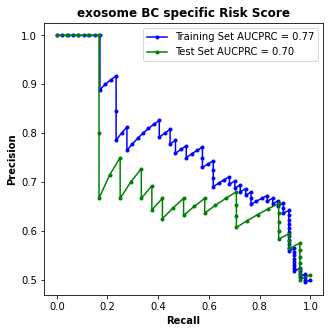

In [225]:
precision_train, recall_train, _ = precision_recall_curve(y_train, y_prob_train,pos_label='tumor')
precision_test, recall_test, _ = precision_recall_curve(y_test, y_prob_log,pos_label='tumor')
# precision_val, recall_val, _ = precision_recall_curve(y_val, y_pred_proba_val,pos_label='tumor')


plt.figure(figsize=(5, 5))
plt.plot(recall_train, precision_train, marker='.', label=f'Training Set AUCPRC = {auprc_train:.2f}', color='blue')

# Plot for test set
# Plot for test set
plt.plot(recall_test, precision_test, marker='.', label=f'Test Set AUCPRC = {auprc_test:.2f}', color='green')

# Plot for validation set
# plt.plot(recall_val, precision_val, marker='.', label='Validation', color='red')

# Labeling the axes and setting the title
plt.xlabel('Recall',fontweight='bold')
plt.ylabel('Precision',fontweight='bold')
plt.title('exosome BC specific Risk Score',fontweight='bold')

# Display the legend
plt.legend()
plt.savefig('/home/zgao/R/GEO_count/python_plot/exosome BC specific logit precision recall.pdf', format='pdf')
# Show the plot
plt.show()

In [115]:
def compute_metrics_from_cm(cm):
    # Extracting values from the confusion matrix
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    # Calculating Sensitivity and Specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    return sensitivity, specificity

In [116]:
y_pred_test_labels = ["tumor" if p >= 0.34 else "normal" for p in y_prob_log]

In [35]:
cm = confusion_matrix(y_test, y_pred_test_labels)
print("Confusion Matrix:")
print(cm)
sensitivity_test, specificity_test = compute_metrics_from_cm(cm)
print("sensitivity_test, specificity_test:")
print(sensitivity_test, specificity_test)

Confusion Matrix:
[[23 11]
 [ 3 21]]
sensitivity_test, specificity_test:
0.875 0.6764705882352942


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(7, 5), text_size=14):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    if classes is None:
        classes = [str(i) for i in range(n_classes)]
        
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm_norm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    ax.set(title='stage I&II GSE83527', 
           xlabel='Predicted Label', 
           ylabel='True Label', 
           xticks=np.arange(n_classes), 
           yticks=np.arange(n_classes), 
           xticklabels=classes, 
           yticklabels=classes)
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size * 1.2)
    
    threshold = (cm_norm.max() + cm_norm.min()) / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)', 
                 horizontalalignment='center', 
                 color='white' if cm_norm[i, j] > threshold else 'black', 
                 size=text_size)
  

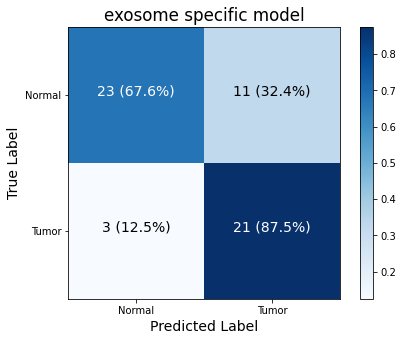

In [37]:
classes = ['Normal', 'Tumor']
plot_confusion_matrix(y_test, y_pred_test_labels, classes)
plt.savefig('/home/zgao/R/GEO_count/python_plot/exosome specific.svg', format='svg')
plt.show()

In [53]:
test_logit=pd.read_csv("R/GEO_count/GSE62182_stage.csv")

In [54]:
test_logit=test_logit.set_index('Unnamed: 0')

In [55]:
test_logit

,group,piR.hsa.100956,piR.hsa.1288731,piR.hsa.141155,piR.hsa.2499988,piR.hsa.2851799,stage_2
Unnamed: 0,,,,,,,
SRR1608125,tumor,5.869801,3.399168,2.206141,2.096594,1.196673,Stage I
SRR1608128,tumor,5.672633,3.286606,3.014828,3.431249,1.630277,Stage IV
SRR1608130,tumor,6.133888,2.750083,3.109548,3.725274,1.915681,Stage II
SRR1608138,tumor,5.574059,2.650135,1.953228,2.349069,1.371504,Stage I
SRR1608150,tumor,5.726711,2.178507,2.229219,3.158927,1.664884,Stage IV
SRR1608151,tumor,6.073327,3.120291,3.149358,3.474663,2.359863,Stage II
SRR1608153,tumor,4.843955,2.151598,1.429580,1.613713,1.386668,Stage III
SRR1608158,tumor,5.769635,2.276667,2.071189,1.642808,1.311996,Stage I
SRR1608163,tumor,5.590804,2.019239,1.863358,1.455792,1.153281,Stage I


In [67]:
def extract_stage_data(test_logit, stage):
    stage_data = test_logit[test_logit['stage_2'] == stage]
    y = stage_data['group']
    X = stage_data.drop(columns=['stage_2', 'group'])
    return X, y


stageI_X, stageI_y = extract_stage_data(test_logit, "Stage I")
stageII_X, stageII_y = extract_stage_data(test_logit, "Stage II")
stageIII_X, stageIII_y = extract_stage_data(test_logit, "Stage III")
stageIV_X, stageIV_y = extract_stage_data(test_logit, "Stage IV")
normal_X, normal_y=extract_stage_data(test_logit,"normal")




In [69]:
stage_early_X= pd.concat([stageI_X, stageII_X,normal_X])
stage_early_y= pd.concat([stageI_y, stageII_y,normal_y])

In [81]:
stageIII_X= pd.concat([stageIII_X, normal_X])
stageIII_y= pd.concat([stageIII_y,normal_y])

In [82]:
print(stage_early_X.shape)
#print(stageII_X.shape)
print(stageIII_X.shape)

(49, 5)
(26, 5)


In [71]:
stage_early_X

,piR.hsa.100956,piR.hsa.1288731,piR.hsa.141155,piR.hsa.2499988,piR.hsa.2851799
Unnamed: 0,,,,,
SRR1608125,5.869801,3.399168,2.206141,2.096594,1.196673
SRR1608138,5.574059,2.650135,1.953228,2.349069,1.371504
SRR1608158,5.769635,2.276667,2.071189,1.642808,1.311996
SRR1608163,5.590804,2.019239,1.863358,1.455792,1.153281
SRR1608164,5.041445,2.886321,2.079672,2.512906,1.412215
SRR1608173,5.744318,1.880319,1.876013,1.588366,1.341807
SRR1608179,5.260987,2.622846,2.101654,1.290763,1.240945
SRR1608180,5.212953,3.360239,2.527140,1.919115,1.313782
SRR1608181,5.507803,3.833069,3.086326,3.582334,1.773154


In [72]:
print(stage_early_y)

Unnamed: 0
SRR1608125     tumor
SRR1608138     tumor
SRR1608158     tumor
SRR1608163     tumor
SRR1608164     tumor
SRR1608173     tumor
SRR1608179     tumor
SRR1608180     tumor
SRR1608181     tumor
SRR1608187     tumor
SRR1608188     tumor
SRR1608189     tumor
SRR1608193     tumor
SRR1608195     tumor
SRR1608210     tumor
SRR1608212     tumor
SRR1608213     tumor
SRR1608214     tumor
SRR1608130     tumor
SRR1608151     tumor
SRR1608165     tumor
SRR1608166     tumor
SRR1608172     tumor
SRR1608175     tumor
SRR1608194     tumor
SRR1608201     tumor
SRR1608207     tumor
SRR1608208     tumor
SRR1608219    normal
SRR1608224    normal
SRR1608238    normal
SRR1608244    normal
SRR1608245    normal
SRR1608247    normal
SRR1608252    normal
SRR1608257    normal
SRR1608259    normal
SRR1608260    normal
SRR1608262    normal
SRR1608267    normal
SRR1608271    normal
SRR1608274    normal
SRR1608275    normal
SRR1608276    normal
SRR1608283    normal
SRR1608299    normal
SRR1608303    normal
SR

In [73]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_log_early = model.predict(stage_early_X)
# Compute accuracy for validation and test sets
acc_log_early = accuracy_score(stage_early_y, y_pred_log_early)

# Compute predicted probabilities for AUC calculation
y_prob_log_early= model.predict_proba(stage_early_X)[:, 1]

# Compute AUC for validation and test sets
auc_log_early = roc_auc_score(stage_early_y, y_prob_log_early)

#roc_curve
y_binary_log_early= label_binarize(stage_early_y, classes=['normal', 'tumor']).flatten()
fpr_log_early, tpr_log_early, thresholds_test_early = roc_curve(y_binary_log_early, y_prob_log_early)
gmeans_test_early = np.sqrt(tpr_log_early * (1-fpr_log_early))

ix = np.argmax(gmeans_test_early)
print(f"Accuracy: {acc_log_early:.4f}")
print(f"AUC: {auc_log_early:.4f}")
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_test_early[ix], gmeans_test_early[ix]))

Accuracy: 0.7959
AUC: 0.8776
Best Threshold=0.694944, G-Mean=0.857


In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_log_late = model.predict(stageIII_X)
# Compute accuracy for validation and test sets
acc_log_late = accuracy_score(stageIII_y, y_pred_log_late)

# Compute predicted probabilities for AUC calculation
y_prob_log_late= model.predict_proba(stageIII_X)[:, 1]

# Compute AUC for validation and test sets
auc_log_late = roc_auc_score(stageIII_y, y_prob_log_late)

#roc_curve
y_binary_log_late= label_binarize(stageIII_y, classes=['normal', 'tumor']).flatten()
fpr_log_late, tpr_log_late, thresholds_test_late = roc_curve(y_binary_log_late, y_prob_log_late)
gmeans_test_late = np.sqrt(tpr_log_late * (1-fpr_log_late))

ix = np.argmax(gmeans_test_late)
print(f"Accuracy: {acc_log_late:.4f}")
print(f"AUC: {auc_log_late:.4f}")
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_test_late[ix], gmeans_test_late[ix]))

Accuracy: 0.7000
AUC: 0.8400
Best Threshold=0.852250, G-Mean=0.800


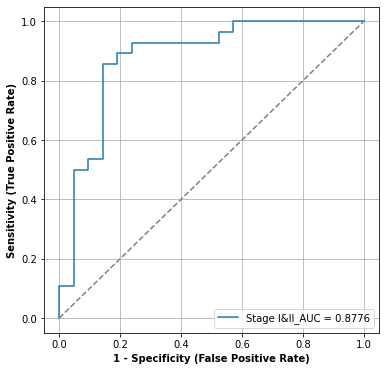

In [74]:
# score

plt.figure(figsize=(6, 6))

# plot ROC curve for the train set
#plt.plot(fpr_log, tpr_log, label=f'Overall_AUC = {auc_log:.4f}')

#plot stageI curve
plt.plot(fpr_log_early, tpr_log_early,label=f'Stage I&II_AUC = {auc_log_early:.4f}')

#plot stageIII curve
#plt.plot(fpr_log_late, tpr_log_late,label=f'Stage III_AUC = {auc_log_late:.4f}')

#plot stageIV curve
#plt.plot(stageIV_score_fpr_log, stageIV_score_tpr_log,label=f'Stage IV_AUC = {stageIV_score_auc_log:.4f}')

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, and other settings
plt.xlabel('1 - Specificity (False Positive Rate)', fontweight='bold')
plt.ylabel('Sensitivity (True Positive Rate)', fontweight='bold')
#plt.title('tissue_piR_hsa_1248077_logistic',fontweight='bold')
legend = plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('/home/zgao/R/GEO_count/python_plot/GSE62182_stage_score_logistic.pdf', format='pdf')
plt.show()


In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(7, 5), text_size=14):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    if classes is None:
        classes = [str(i) for i in range(n_classes)]
        
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm_norm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    ax.set(title='stage I&II GSE62182', 
           xlabel='Predicted Label', 
           ylabel='True Label', 
           xticks=np.arange(n_classes), 
           yticks=np.arange(n_classes), 
           xticklabels=classes, 
           yticklabels=classes)
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size * 1.2)
    
    threshold = (cm_norm.max() + cm_norm.min()) / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)', 
                 horizontalalignment='center', 
                 color='white' if cm_norm[i, j] > threshold else 'black', 
                 size=text_size)

In [79]:
y_pred_test_labels = ["tumor" if p >= 0.694944 else "normal" for p in y_prob_log_early]

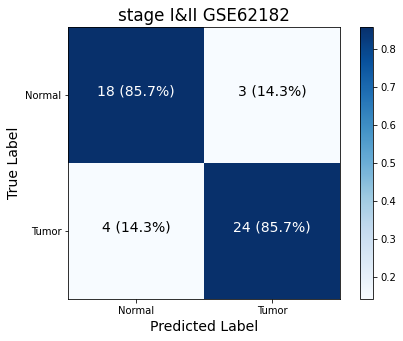

In [80]:
classes = ['Normal', 'Tumor']
plot_confusion_matrix(stage_early_y, y_pred_test_labels, classes)
plt.savefig('/home/zgao/R/GEO_count/python_plot/GSE62182_logit_stageI&II_confusion_matrix.svg', format='svg')
plt.show()


In [40]:
test_data=pd.read_csv("R/GEO_count/CHTN_rf.csv")
test_data2=pd.read_csv("R/GEO_count/CHTN_rf_all.csv")
test_data3=pd.read_csv("R/GEO_count/CHTN_BH_rf.csv")

In [41]:
test_data=test_data.set_index('Unnamed: 0')
X = test_data.drop(columns=['group'])
y = test_data['group']

test_data2=test_data2.set_index('Unnamed: 0')
X2 = test_data2.drop(columns=['group'])
y2 = test_data2['group']

test_data3=test_data3.set_index('Unnamed: 0')
X3 = test_data3.drop(columns=['group'])
y3 = test_data3['group']

In [42]:
scores = intercept + np.dot(X, coefficients)
#normaliaze the score
min_score = np.min(scores)
max_score = np.max(scores)
normalized_scores = (scores - min_score) / (max_score - min_score)
print(normalized_scores)


scores2 = intercept + np.dot(X2, coefficients)
#normaliaze the score
min_score2 = np.min(scores2)
max_score2 = np.max(scores2)
normalized_scores2 = (scores2 - min_score2) / (max_score2 - min_score2)
print(normalized_scores2)


scores3 = intercept + np.dot(X3, coefficients)
#normaliaze the score
min_score3 = np.min(scores3)
max_score3 = np.max(scores3)
normalized_scores3 = (scores3 - min_score3) / (max_score3 - min_score3)
print(normalized_scores3)

[0.35090575 0.31074577 0.71708095 0.55330146 0.43639093 0.59293283
 0.44895024 0.45087828 0.         0.65035663 0.05696105 0.40512352
 0.66860613 0.70685349 0.59600108 0.68237949 0.63568443 0.53294115
 0.76816516 0.49744368 0.64852449 0.30078792 0.57989284 0.6140957
 0.43017472 0.7185783  0.62442118 0.42597782 0.58478472 0.59306166
 0.86669965 0.71429669 0.6543977  0.40800785 0.52615024 0.70401259
 0.37140393 0.79860109 0.61981897 0.73261444 0.45920686 0.51328315
 0.6035333  0.71139332 0.71989599 0.69097795 0.7174787  0.57859617
 0.65565691 0.64013195 0.79583098 0.7298978  0.65087532 0.5551193
 0.66656695 0.6490521  0.33899573 0.6550365  0.85310739 0.73602747
 0.81071131 0.88167805 0.65072738 0.48961709 0.39876911 0.6798228
 0.69757904 0.70758794 0.77169023 0.93671109 0.65323433 0.37611657
 0.27300398 0.66359991 0.48911443 0.66748156 0.60169454 0.62987765
 0.32932147 0.55240451 0.66420612 0.68422624 0.40820692 0.46334563
 0.24497149 0.73765537 0.46545241 0.92697593 0.44798906 0.3818891

In [43]:
test_data['risk_score']=normalized_scores
#test_data['prediction_probability']=y_prob_log
test_data['prediction']=np.where(test_data['risk_score']>0.5,'tumor','normal')
test_data.to_csv("/home/zgao/R/GEO_count/CHTN_CH_testdata2.csv")

test_data2['risk_score']=normalized_scores2
#test_data['prediction_probability']=y_prob_log
test_data2['prediction']=np.where(test_data2['risk_score']>0.5,'tumor','normal')
test_data2.to_csv("/home/zgao/R/GEO_count/CHTN_testdata2.csv")

test_data3['risk_score']=normalized_scores3
#test_data['prediction_probability']=y_prob_log
test_data3['prediction']=np.where(test_data3['risk_score']>0.5,'tumor','normal')
test_data3.to_csv("/home/zgao/R/GEO_count/CHTN_BH_testdata.csv")

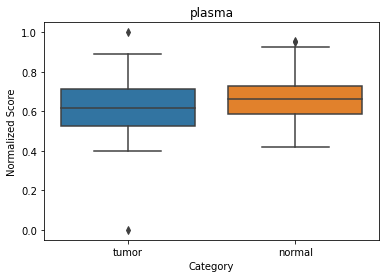

In [112]:
sns.boxplot(x='group', y='risk_score', data=test_data3)
plt.title('plasma')
plt.xlabel('Category')
plt.ylabel('Normalized Score')
plt.show()

In [44]:
def analyze_dataset(test_data):
    X = test_data[['risk_score']].values  # Extracting as 2D array
    y = test_data['group'].values  # Extracting as 1D array

    # Initialize and fit the model
    model = LogisticRegression()
    model.fit(X, y)

    y_pred_log = model.predict(X)
    # Compute accuracy for validation and test sets
    acc_log = accuracy_score(y, y_pred_log)

    # Compute predicted probabilities for AUC calculation
    y_prob_log = model.predict_proba(X)[:, 1]

    # Compute AUC for validation and test sets
    auc_log = roc_auc_score(y, y_prob_log)

    # roc_curve
    y_binary_log = label_binarize(y, classes=['normal', 'tumor']).flatten()
    fpr_log, tpr_log, _ = roc_curve(y_binary_log, y_prob_log)

    print(f"Accuracy: {acc_log:.4f}")
    print(f"AUC: {auc_log:.4f}")

    return fpr_log, tpr_log, auc_log

# Analyze the three datasets
print("Results for test_data1:")
fpr_log1, tpr_log1, auc_log1 = analyze_dataset(test_data)

print("\nResults for test_data2:")
fpr_log2, tpr_log2, auc_log2 = analyze_dataset(test_data2)

print("\nResults for test_data3:")
fpr_log3, tpr_log3, auc_log3 = analyze_dataset(test_data3)

Results for test_data1:
Accuracy: 0.6106
AUC: 0.6526

Results for test_data2:
Accuracy: 0.7812
AUC: 0.6444

Results for test_data3:
Accuracy: 0.6529
AUC: 0.6275


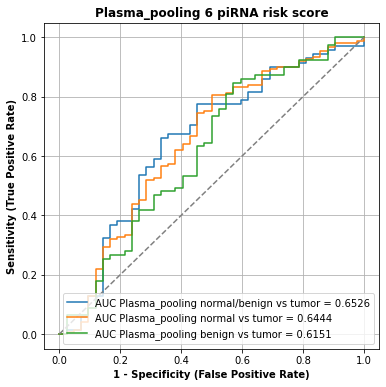

In [39]:
# score

plt.figure(figsize=(6, 6))

# plot ROC curve for the train set
plt.plot(fpr_log1, tpr_log1, label=f'AUC Plasma_pooling normal/benign vs tumor = {auc_log1:.4f}')

plt.plot(fpr_log2, tpr_log2, label=f'AUC Plasma_pooling normal vs tumor = {auc_log2:.4f}')

plt.plot(fpr_log3, tpr_log3, label=f'AUC Plasma_pooling benign vs tumor = {auc_log3:.4f}')

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, and other settings
plt.xlabel('1 - Specificity (False Positive Rate)', fontweight='bold')
plt.ylabel('Sensitivity (True Positive Rate)', fontweight='bold')
plt.title('Plasma_pooling 6 piRNA risk score',fontweight='bold')
legend = plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('/home/zgao/R/GEO_count/plot_new/pooling_risk_score_roc2.pdf', format='pdf')
plt.show()


In [89]:
test_data=pd.read_csv("R/GEO_count/CHTN_rf.csv")

In [90]:
test_data=test_data.set_index('Unnamed: 0')
X = test_data.drop(columns=['group'])
y = test_data['group']

In [88]:
coefficients=np.delete(coefficients,[2,5])
print(coefficients)

IndexError: index 5 is out of bounds for axis 0 with size 4

In [75]:
scores = intercept + np.dot(X, coefficients)
#normaliaze the score
min_score = np.min(scores)
max_score = np.max(scores)
normalized_scores = (scores - min_score) / (max_score - min_score)
print(normalized_scores)

[0.51881156 0.43601863 0.35822108 0.42383302 0.43810941 0.3990065
 0.42511055 0.27085891 0.44311834 0.39365142 0.55608211 0.50800033
 0.59135521 0.34608549 0.37767442 0.34956166 0.41396094 0.51587736
 0.56699335 0.57002689 0.4967262  1.         0.71621935 0.6905554
 0.57728818 0.69666555 0.86005405 0.61021321 0.54464668 0.71931476
 0.62605519 0.3194817  0.6724966  0.62768736 0.60870465 0.59937595
 0.53458548 0.61024469 0.60301097 0.56993675 0.67436201 0.57129504
 0.56515853 0.53989419 0.62614212 0.57885303 0.60373941 0.53766827
 0.51995485 0.66486488 0.38498255 0.71844366 0.57880415 0.54748578
 0.61516231 0.65070074 0.526444   0.6805301  0.22607481 0.30751199
 0.35353892 0.26284347 0.17891288 0.25114171 0.35361949 0.25003639
 0.77609934 0.50680264 0.34147185 0.36500491 0.83774024 0.35643889
 0.43562044 0.23898826 0.6347413  0.49171873 0.60774825 0.22293677
 0.44500455 0.98376504 0.5440722  0.54358258 0.38211171 0.38762567
 0.37825852 0.44280694 0.38621256 0.4127417  0.28818857 0.409270

In [76]:
test_data['risk_score']=normalized_scores
#test_data['prediction_probability']=y_prob_log
test_data['prediction']=np.where(test_data['risk_score']>0.5,'tumor','normal')


In [77]:
X = test_data[['risk_score']].values  # Extracting as 2D array
y = test_data['group'].values  # Extracting as 1D array

# Initialize and fit the model
model = LogisticRegression()
model.fit(X, y)

y_pred_log = model.predict(X)
# Compute accuracy for validation and test sets
acc_log = accuracy_score(y, y_pred_log)

# Compute predicted probabilities for AUC calculation
y_prob_log = model.predict_proba(X)[:, 1]

# Compute AUC for validation and test sets
auc_log = roc_auc_score(y, y_prob_log)

#roc_curve
y_binary_log = label_binarize(y, classes=['normal', 'tumor']).flatten()
fpr_log, tpr_log, _ = roc_curve(y_binary_log, y_prob_log)

print(f"Accuracy: {acc_log:.4f}")
print(f"AUC: {auc_log:.4f}")

test_data['prediction_probability']=y_prob_log
#test_data.to_csv("/home/zgao/R/GEO_count/GSE83527_heatmap.csv")


Accuracy: 0.6536
AUC: 0.6148


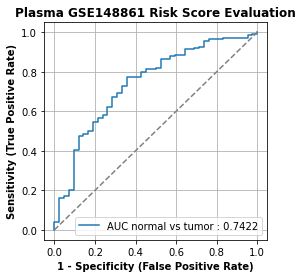

In [51]:
# score

plt.figure(figsize=(4, 4))

# plot ROC curve for the train set
plt.plot(fpr_log, tpr_log, label=f'AUC normal vs tumor : {auc_log:.4f}')


# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, and other settings
plt.xlabel('1 - Specificity (False Positive Rate)', fontweight='bold')
plt.ylabel('Sensitivity (True Positive Rate)', fontweight='bold')
plt.title('Plasma GSE148861 Risk Score Evaluation',fontweight='bold')
legend = plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('/home/zgao/R/GEO_count/plot_new/GSE148861_risk_score_roc.pdf', format='pdf')
plt.show()


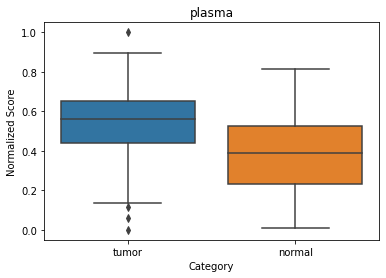

In [52]:
sns.boxplot(x='group', y='risk_score', data=test_data)
plt.title('plasma')
plt.xlabel('Category')
plt.ylabel('Normalized Score')
plt.show()

In [333]:
score_heatmap = np.transpose(plasma_rf.iloc[:, [7, 8]])

annotation_col = pd.DataFrame({'Tissue_type': plasma_rf['group'].values}, index=plasma_rf.index)
annotation_col['Prediction'] = plasma_rf['prediction'].values

In [334]:
annotation_col

,Tissue_type,Prediction
Unnamed: 0,,
TCGA.22.4609.01A.21H.2124.13,tumor,tumor
TCGA.22.4609.11A.01H.2124.13,normal,tumor
TCGA.22.5472.01A.01T.1634.13,tumor,tumor
TCGA.22.5472.11A.11H.2124.13,normal,normal
TCGA.22.5478.01A.01T.1634.13,tumor,tumor
...,...,...
TCGA.92.7340.11A.01H.2044.13,normal,normal
TCGA.92.7341.01A.31H.2044.13,tumor,tumor
TCGA.92.7341.11A.01H.2044.13,normal,tumor


<Figure size 720x360 with 0 Axes>

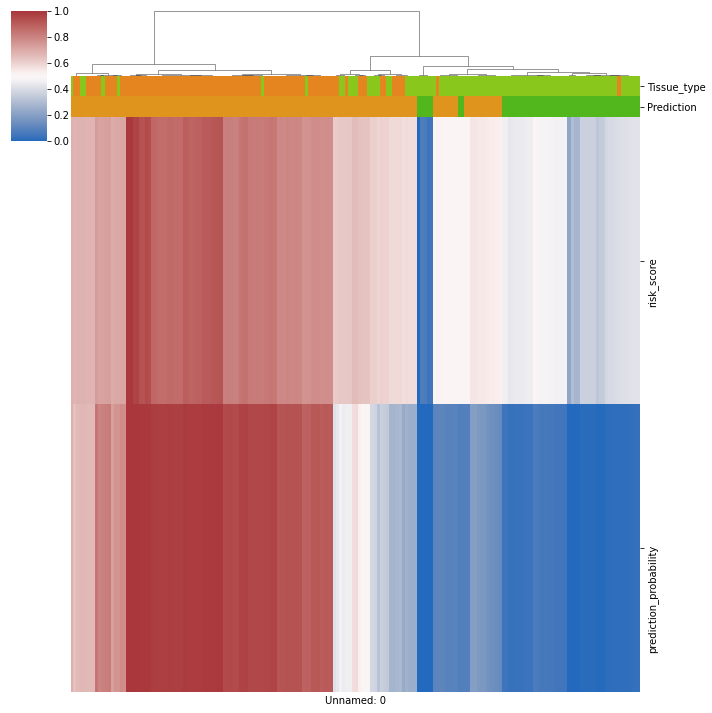

In [335]:
score_heatmap = np.transpose(plasma_rf.iloc[:, [7, 8]])

# Creating annotation_col as before
annotation_col = pd.DataFrame({'Tissue_type': plasma_rf['group'].values, 'Prediction': plasma_rf['prediction'].values}, index=plasma_rf.index)

# Creating a color map
ann_colors = {
    'Tissue_type': {
        'tumor': "#e48520",
        'normal': "#89c71d"
    },
    'Prediction': {
        'tumor': "#df951d",
        'normal': "#52b71d"
    }
}

# Replacing the labels with the colors
annotation_col_colors = annotation_col.replace(ann_colors)

# Plotting the heatmap
plt.figure(figsize=(10,5))
sns.clustermap(score_heatmap,
               row_cluster=False,
               col_cluster=True,
               dendrogram_ratio=0.1,
               method="ward",
               cmap="vlag",
               col_colors=annotation_col_colors,  # use the DataFrame of colors
               xticklabels=False,
               yticklabels=True)
plt.show()






In [35]:
plasma_rf2=pd.read_csv("R/GEO_count/CHTN_BC_rf.csv")

In [36]:
plasma_rf2.iloc[:,0]

0      RUSH_sample001
1      RUSH_sample002
2      RUSH_sample003
3      RUSH_sample004
4      RUSH_sample005
            ...      
228    RUSH_sample229
229    RUSH_sample230
230    RUSH_sample231
231    RUSH_sample232
232    RUSH_sample233
Name: Unnamed: 0, Length: 233, dtype: object

In [37]:
plasma_rf2=plasma_rf2.set_index('Unnamed: 0')

In [38]:
plasma_rf2

,group,piR-hsa-100956,piR-hsa-1243473,piR-hsa-1248077,piR-hsa-1251177,piR-hsa-130959,piR-hsa-162229
Unnamed: 0,,,,,,,
RUSH_sample001,normal,7.632547,6.912869,5.230415,7.599085,8.531000,6.031489
RUSH_sample002,normal,7.047996,6.646101,5.894568,8.654129,8.010076,5.789544
RUSH_sample003,normal,7.806511,6.537999,5.484230,7.892110,8.676535,6.018949
RUSH_sample004,normal,7.339643,6.695873,6.872975,8.386942,8.242664,6.488129
RUSH_sample005,normal,7.610784,6.864956,7.236400,8.190236,8.068534,6.261265
...,...,...,...,...,...,...,...
RUSH_sample229,normal,7.403964,7.403964,4.730305,8.212018,3.788973,3.788973
RUSH_sample230,normal,7.794829,7.595886,4.795851,8.230078,5.713732,4.648396
RUSH_sample231,normal,7.269353,7.775631,4.354415,8.264343,5.403794,4.354415


In [39]:
X2 = plasma_rf2.drop(columns=['group'])

In [40]:
y2 = plasma_rf2['group']

In [41]:
X2

,piR-hsa-100956,piR-hsa-1243473,piR-hsa-1248077,piR-hsa-1251177,piR-hsa-130959,piR-hsa-162229
Unnamed: 0,,,,,,
RUSH_sample001,7.632547,6.912869,5.230415,7.599085,8.531000,6.031489
RUSH_sample002,7.047996,6.646101,5.894568,8.654129,8.010076,5.789544
RUSH_sample003,7.806511,6.537999,5.484230,7.892110,8.676535,6.018949
RUSH_sample004,7.339643,6.695873,6.872975,8.386942,8.242664,6.488129
RUSH_sample005,7.610784,6.864956,7.236400,8.190236,8.068534,6.261265
...,...,...,...,...,...,...
RUSH_sample229,7.403964,7.403964,4.730305,8.212018,3.788973,3.788973
RUSH_sample230,7.794829,7.595886,4.795851,8.230078,5.713732,4.648396
RUSH_sample231,7.269353,7.775631,4.354415,8.264343,5.403794,4.354415


In [42]:
y2.value_counts()

tumor     117
normal    116
Name: group, dtype: int64

In [43]:
model2 = LogisticRegression()
model2.fit(X2, y2)

LogisticRegression()

In [44]:
y_pred_log2 = model2.predict(X2)

In [45]:
# Compute accuracy for validation and test sets
acc_log2 = accuracy_score(y2, y_pred_log2)

# Compute predicted probabilities for AUC calculation
y_prob_log2 = model2.predict_proba(X2)[:, 1]

# Compute AUC for validation and test sets
auc_log2 = roc_auc_score(y2, y_prob_log2)

#roc_curve
y_binary_log2 = label_binarize(y2, classes=['normal', 'tumor']).flatten()
fpr_log2, tpr_log2, _ = roc_curve(y_binary_log2, y_prob_log2)



print(f"Accuracy: {acc_log2:.4f}")
print(f"AUC: {auc_log2:.4f}")


Accuracy: 0.6481
AUC: 0.7084


In [46]:
coefficients2=model2.coef_[0]
print(f'Coefficients: {coefficients}')

Coefficients: [-0.8727857   0.44274308  0.70496344  0.20817812  0.09461705  0.28667507]


In [47]:
intercept2 = model2.intercept_[0]

In [48]:
scores2 = intercept2 + np.dot(X2, coefficients2)
#normaliaze the score
min_score2 = np.min(scores2)
max_score2 = np.max(scores2)
normalized_scores2 = (scores2 - min_score2) / (max_score2 - min_score2)

In [49]:
normalized_scores2

array([0.50428993, 0.5295706 , 0.50635965, 0.73855166, 0.80617644,
       0.58572112, 0.26632099, 0.42340721, 0.59235349, 0.65608721,
       0.588363  , 0.55654686, 0.24207583, 0.4655216 , 0.41558384,
       0.4032545 , 0.46148851, 0.59207368, 0.41732027, 0.55415951,
       0.3538126 , 0.66615463, 0.43294348, 0.47164965, 0.71982047,
       0.66939826, 1.        , 0.83767307, 0.83905927, 0.87239889,
       0.5369312 , 0.69728288, 0.5844676 , 0.33130526, 0.3343604 ,
       0.36518764, 0.57267035, 0.6536373 , 0.51532853, 0.68259486,
       0.65671945, 0.62949164, 0.65950664, 0.57369607, 0.66409168,
       0.56838635, 0.63841727, 0.50863703, 0.64918769, 0.70902969,
       0.67257406, 0.42915636, 0.36006001, 0.69669306, 0.35533334,
       0.49538721, 0.67985557, 0.46684968, 0.56611872, 0.51918854,
       0.52942225, 0.46006594, 0.50001879, 0.68524181, 0.65852274,
       0.57239743, 0.66199398, 0.406555  , 0.41337233, 0.45479309,
       0.58746787, 0.57680945, 0.29438338, 0.38463484, 0.44421

In [50]:
plasma_rf2['risk_score']=normalized_scores2
plasma_rf2['prediction_probability']=y_prob_log2
plasma_rf2['prediction']=np.where(plasma_rf2['risk_score']>0.5,'tumor','normal')


In [51]:
plasma_rf2

,group,piR-hsa-100956,piR-hsa-1243473,piR-hsa-1248077,piR-hsa-1251177,piR-hsa-130959,piR-hsa-162229,risk_score,prediction_probability,prediction
Unnamed: 0,,,,,,,,,,
RUSH_sample001,normal,7.632547,6.912869,5.230415,7.599085,8.531000,6.031489,0.504290,0.586595,tumor
RUSH_sample002,normal,7.047996,6.646101,5.894568,8.654129,8.010076,5.789544,0.529571,0.616413,tumor
RUSH_sample003,normal,7.806511,6.537999,5.484230,7.892110,8.676535,6.018949,0.506360,0.589064,tumor
RUSH_sample004,normal,7.339643,6.695873,6.872975,8.386942,8.242664,6.488129,0.738552,0.818029,tumor
RUSH_sample005,normal,7.610784,6.864956,7.236400,8.190236,8.068534,6.261265,0.806176,0.862466,tumor
...,...,...,...,...,...,...,...,...,...,...
RUSH_sample229,normal,7.403964,7.403964,4.730305,8.212018,3.788973,3.788973,0.287957,0.328500,normal
RUSH_sample230,normal,7.794829,7.595886,4.795851,8.230078,5.713732,4.648396,0.519217,0.604293,tumor
RUSH_sample231,normal,7.269353,7.775631,4.354415,8.264343,5.403794,4.354415,0.405911,0.466462,normal


In [52]:
plasma_rf2.to_csv("/home/zgao/R/GEO_count/CHTN_BC_heatmap.csv")

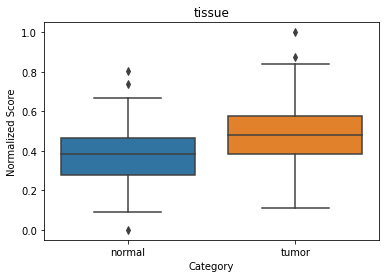

In [53]:
sns.boxplot(x='group', y='risk_score', data=plasma_rf2)
plt.title('tissue')
plt.xlabel('Category')
plt.ylabel('Normalized Score')
plt.show()

In [54]:
X2 = plasma_rf2[['risk_score']].values  # Extracting as 2D array
y2 = plasma_rf2['group'].values  # Extracting as 1D array

# Initialize and fit the model
model2 = LogisticRegression()
model2.fit(X2, y2)

LogisticRegression()

In [55]:
y_pred_log2 = model2.predict(X2)
# Compute accuracy for validation and test sets
acc_log2 = accuracy_score(y2, y_pred_log2)

# Compute predicted probabilities for AUC calculation
y_prob_log2 = model2.predict_proba(X2)[:, 1]

# Compute AUC for validation and test sets
auc_log2 = roc_auc_score(y2, y_prob_log2)

#roc_curve
y_binary_log2 = label_binarize(y2, classes=['normal', 'tumor']).flatten()
fpr_log2, tpr_log2, _ = roc_curve(y_binary_log2, y_prob_log2)

print(f"Accuracy: {acc_log2:.4f}")
print(f"AUC: {auc_log2:.4f}")

Accuracy: 0.6438
AUC: 0.7084


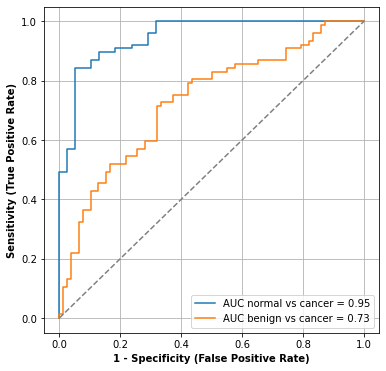

In [164]:
# Assuming fpr_val, tpr_val, and auc_val contain the FPR, TPR, and AUC for the validation set

plt.figure(figsize=(6, 6))

# plot ROC curve for the all set
plt.plot(fpr_log, tpr_log, label=f'AUC normal vs cancer = {auc_log:.2f}')

plt.plot(fpr_log2, tpr_log2, label=f'AUC benign vs cancer = {auc_log2:.2f}')

# Plot diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels, title, and other settings
plt.xlabel('1 - Specificity (False Positive Rate)', fontweight='bold')
plt.ylabel('Sensitivity (True Positive Rate)', fontweight='bold')

legend = plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('/home/zgao/R/GEO_count/plot_new/CHTN_score_roc.pdf', format='pdf')
plt.show()
